In [16]:
# Dependencies
import gempy as gp
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from gempy.assets import topology as tp

import warnings

warnings.filterwarnings("ignore")

pd.set_option("display.precision", 2)

# Creating model object and indicating path
data_path = "../../../../../input/BES/interpreted_seismics_2/horizontes/teste_1/"
nome_modelo = "BES-Seismics-Horizontes-Luis_Teste-1"
geo_model = gp.create_model(nome_modelo)

### Detalhes dos dados
- Contém os horizontes interpolados pelo Petrel a partir de interpretação sismica
- Todos os horizontes foram reduzidos em X e Y para diminuir a quantidade de pontos (1000). De 386mil pontos para 1453. Quanto mais ponto, mais memoria usa.
- Cada horizonte (surface no GemPy) é uma série
- Ponto de orientação gerado com KNN pelo GemPy (Quando salvar a orientação gerada, precisa trocar o header surfaces para formation, se for abrir o .csv ao invés de rodar sempre o KNN)

## Step by step

In [17]:
# Loading model, the extension, the resolution and importing the data
gp.init_data(
    geo_model,
    extent=[431215.754, 474015.754, 7785829.449, 7795029.449, -6544.67, -2466.97],
    resolution=[100, 100, 100],
    path_i=data_path + "sp_1000m_not_scaled.csv",
    path_o=data_path + "orientations_points_2.csv",
)

Active grids: ['regular']


BES-Seismics-Horizontes-Luis_Teste-1  2024-03-26 11:11

In [18]:
gp.get_data(
    geo_model,
    "surfaces",
)

,surface,series,order_surfaces,color,id
0,top,Default series,1,#015482,1
1,mid,Default series,2,#9f0052,2
2,base,Default series,3,#ffbe00,3
3,basement,Basement,1,#728f02,4


In [19]:
# Ordenando as surfaces (Estratigrafia (topo para base)) 1
gp.map_stack_to_surfaces(
    geo_model,
    {
        "Strat_Series_1": ("top",),
        "Strat_Series_2": ("mid",),
        "Strat_Series_3": ("base",),
        "Basement_series": ("basement",),
    },
)

,surface,series,order_surfaces,color,id
0,top,Strat_Series_1,1,#015482,1
1,mid,Strat_Series_2,1,#9f0052,2
2,base,Strat_Series_3,1,#ffbe00,3
3,basement,Basement_series,1,#728f02,4


In [20]:
geo_model.series

,order_series,BottomRelation,isActive,isFault,isFinite
Strat_Series_1,1,Erosion,True,False,False
Strat_Series_2,2,Erosion,True,False,False
Strat_Series_3,3,Erosion,True,False,False
Basement_series,4,Erosion,False,False,False


In [21]:
geo_model.get_data()

X         Y        Z    smooth surface   G_x   
surface_points 0     431215.75  7.79e+06 -2905.49  2.00e-06     top   NaN  \
               1     432015.75  7.79e+06 -2965.06  2.00e-06     top   NaN   
               2     433015.75  7.79e+06 -3043.23  2.00e-06     top   NaN   
               3     434015.75  7.79e+06 -3120.30  2.00e-06     top   NaN   
               4     435015.75  7.79e+06 -3195.17  2.00e-06     top   NaN   
...                        ...       ...      ...       ...     ...   ...   
orientations   1447  470015.75  7.80e+06 -5884.08  1.00e-02    base  0.05   
               1448  471015.75  7.80e+06 -5936.45  1.00e-02    base  0.05   
               1449  472015.75  7.80e+06 -5983.97  1.00e-02    base  0.05   
               1450  473015.75  7.80e+06 -6028.57  1.00e-02    base  0.05   
               1451  474015.75  7.80e+06 -6071.88  1.00e-02    base  0.05   

                          G_y  G_z  
surface_points 0          NaN  NaN  
               1          NaN  NaN  
               2          NaN  NaN  
               3          NaN  NaN  
               4          NaN  NaN  
...                       ...  ...  
orientations   1447 -1.32e-03  1.0  
               1448 -1.10e-04  1.0  
               1449 -8.35e-04  1.0  
               1450 -1.69e-03  1.0  
               1451 -3.13e-03  1.0  

[2904 rows x 8 columns]

- Precisar criar os pontos de orientação com o código abaixo

In [9]:
neighbours = gp.select_nearest_surfaces_points(geo_model, geo_model.surface_points.df, 10)
opoints = gp.set_orientation_from_neighbours_all(geo_model, neighbours)

In [10]:
geo_model.get_data()

X         Y        Z    smooth surface   G_x   
surface_points 0    431215.75  7.79e+06 -2905.49  2.00e-06     top   NaN  \
               1    432015.75  7.79e+06 -2965.06  2.00e-06     top   NaN   
               2    433015.75  7.79e+06 -3043.23  2.00e-06     top   NaN   
               3    434015.75  7.79e+06 -3120.30  2.00e-06     top   NaN   
               4    435015.75  7.79e+06 -3195.17  2.00e-06     top   NaN   
...                       ...       ...      ...       ...     ...   ...   
orientations   479  470015.75  7.80e+06 -5884.08  1.00e-02    base  0.05   
               480  471015.75  7.80e+06 -5936.45  1.00e-02    base  0.05   
               481  472015.75  7.80e+06 -5983.97  1.00e-02    base  0.05   
               482  473015.75  7.80e+06 -6028.57  1.00e-02    base  0.05   
               483  474015.75  7.80e+06 -6071.88  1.00e-02    base  0.05   

                         G_y  G_z  
surface_points 0         NaN  NaN  
               1         NaN  NaN  
               2         NaN  NaN  
               3         NaN  NaN  
               4         NaN  NaN  
...                      ...  ...  
orientations   479 -1.32e-03  1.0  
               480 -1.10e-04  1.0  
               481 -8.35e-04  1.0  
               482 -1.69e-03  1.0  
               483 -3.13e-03  1.0  

[2904 rows x 8 columns]

In [11]:
# Salvando os pontos de orientação gerados pelo KNN (K=10)
orientations_p = geo_model.orientations.df
orientations_p.to_csv(data_path + "orientations_points.csv")
orientations_p

,X,Y,Z,X_c,Y_c,Z_c,G_x,G_y,G_z,dip,azimuth,polarity,surface,series,id,order_series,smooth
968,431215.75,7.79e+06,-2905.49,0.25,0.45,0.52,0.08,-1.78e-02,1.0,4.51,103.05,1.0,top,Strat_Series_1,1.0,1.0,0.01
969,432015.75,7.79e+06,-2965.06,0.26,0.45,0.52,0.08,-1.74e-02,1.0,4.51,102.79,1.0,top,Strat_Series_1,1.0,1.0,0.01
970,433015.75,7.79e+06,-3043.23,0.27,0.45,0.52,0.08,-1.72e-02,1.0,4.52,102.58,1.0,top,Strat_Series_1,1.0,1.0,0.01
971,434015.75,7.79e+06,-3120.30,0.28,0.45,0.52,0.08,-1.50e-02,1.0,4.42,101.27,1.0,top,Strat_Series_1,1.0,1.0,0.01
972,435015.75,7.79e+06,-3195.17,0.29,0.45,0.51,0.07,-1.35e-02,1.0,4.23,100.51,1.0,top,Strat_Series_1,1.0,1.0,0.01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
479,470015.75,7.80e+06,-5884.08,0.70,0.55,0.48,0.05,-1.32e-03,1.0,3.14,91.38,1.0,base,Strat_Series_3,3.0,3.0,0.01
480,471015.75,7.80e+06,-5936.45,0.72,0.55,0.48,0.05,-1.10e-04,1.0,2.89,90.12,1.0,base,Strat_Series_3,3.0,3.0,0.01
481,472015.75,7.80e+06,-5983.97,0.73,0.55,0.48,0.05,-8.35e-04,1.0,2.72,91.01,1.0,base,Strat_Series_3,3.0,3.0,0.01
482,473015.75,7.80e+06,-6028.57,0.74,0.55,0.48,0.05,-1.69e-03,1.0,2.69,92.06,1.0,base,Strat_Series_3,3.0,3.0,0.01


In [12]:
# Trocando o nome de surface para formation (necessário se for importar no Gempy)
orientations_p_formation = orientations_p.copy()
orientations_p_formation = orientations_p_formation.rename(columns={'surface': 'formation'})
orientations_p_formation.to_csv(data_path + "orientations_points_2.csv")
orientations_p_formation

,X,Y,Z,X_c,Y_c,Z_c,G_x,G_y,G_z,dip,azimuth,polarity,formation,series,id,order_series,smooth
968,431215.75,7.79e+06,-2905.49,0.25,0.45,0.52,0.08,-1.78e-02,1.0,4.51,103.05,1.0,top,Strat_Series_1,1.0,1.0,0.01
969,432015.75,7.79e+06,-2965.06,0.26,0.45,0.52,0.08,-1.74e-02,1.0,4.51,102.79,1.0,top,Strat_Series_1,1.0,1.0,0.01
970,433015.75,7.79e+06,-3043.23,0.27,0.45,0.52,0.08,-1.72e-02,1.0,4.52,102.58,1.0,top,Strat_Series_1,1.0,1.0,0.01
971,434015.75,7.79e+06,-3120.30,0.28,0.45,0.52,0.08,-1.50e-02,1.0,4.42,101.27,1.0,top,Strat_Series_1,1.0,1.0,0.01
972,435015.75,7.79e+06,-3195.17,0.29,0.45,0.51,0.07,-1.35e-02,1.0,4.23,100.51,1.0,top,Strat_Series_1,1.0,1.0,0.01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
479,470015.75,7.80e+06,-5884.08,0.70,0.55,0.48,0.05,-1.32e-03,1.0,3.14,91.38,1.0,base,Strat_Series_3,3.0,3.0,0.01
480,471015.75,7.80e+06,-5936.45,0.72,0.55,0.48,0.05,-1.10e-04,1.0,2.89,90.12,1.0,base,Strat_Series_3,3.0,3.0,0.01
481,472015.75,7.80e+06,-5983.97,0.73,0.55,0.48,0.05,-8.35e-04,1.0,2.72,91.01,1.0,base,Strat_Series_3,3.0,3.0,0.01
482,473015.75,7.80e+06,-6028.57,0.74,0.55,0.48,0.05,-1.69e-03,1.0,2.69,92.06,1.0,base,Strat_Series_3,3.0,3.0,0.01


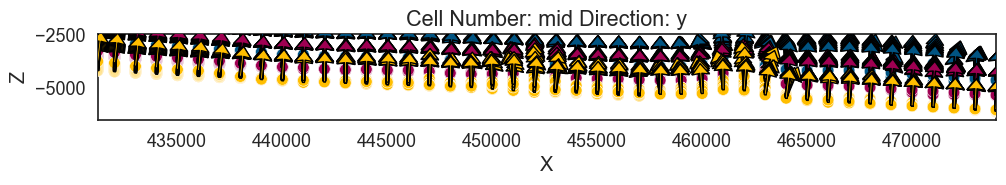

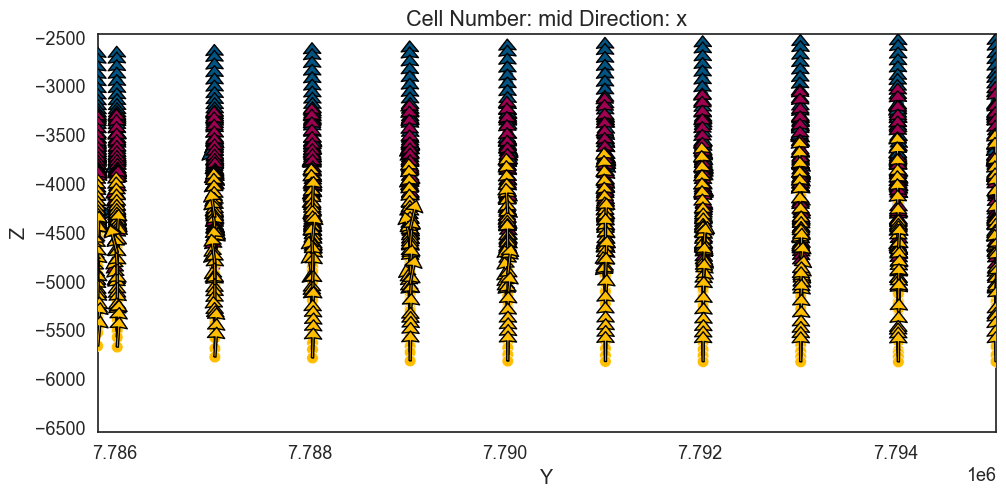

In [22]:
# Seção transversal do modelo
gp.plot_2d(geo_model, direction="y", show_data=True, show_lith=True, ve=1, legend=False)
gp.plot_2d(geo_model, direction="x", show_data=True, show_lith=True, ve=1, legend=False)
# gp.plot_2d(geo_model, direction="z", show_data=True, show_lith=True, ve=1, legend=False)

In [14]:
# Ver os dados em 3D
gpv = gp.plot_3d(
    geo_model,
    plotter_type="background",
    image=False,
    show_data=True,
    show_surfaces=True,
    show_scalar=True,
    show_boundaries=True,
    ve=5,
)

In [23]:
%%time
gp.set_interpolator(
    geo_model, 
    output=['geology'], 
    compile_theano=True, 
    theano_optimizer='fast_run', # fast_compile, fast_run
    dtype="float64",  # for model stability
    verbose=[]
)

Setting kriging parameters to their default values.
Compiling aesara function...
Level of Optimization:  fast_compile
Device:  cpu
Precision:  float64
Number of faults:  0
Compilation Done!
Kriging values: 
                        values
range                43967.12
$C_o$             46026372.32
drift equations  [3, 3, 3, 3]
CPU times: total: 17.4 s
Wall time: 18.1 s


In [24]:
geo_model.update_to_interpolator()

True

In [25]:
%%time
gp.compute_model(
    geo_model, 
    compute_mesh=True,
    )

CPU times: total: 59min 35s
Wall time: 11min 19s



Lithology ids 
  [4. 4. 4. ... 1. 1. 1.] 

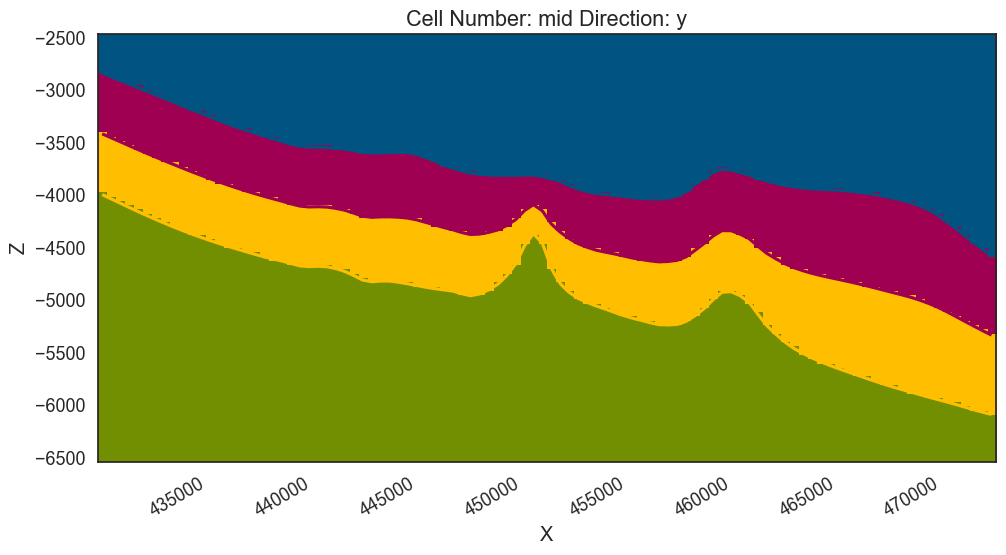

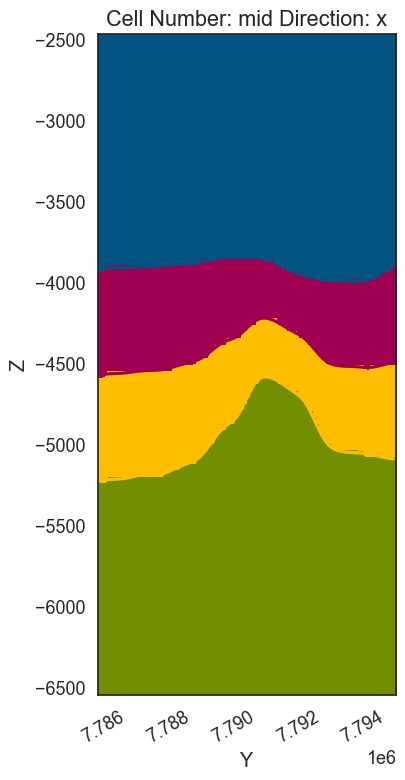

In [26]:
# Seção transversal do modelo
gp.plot_2d(
    geo_model,
    direction="y",
    show_data=False,
    show_lith=True,
    ve=5,
)
gp.plot_2d(
    geo_model,
    direction="x",
    show_data=False,
    show_lith=True,
    ve=5,
    legend=True,
)

In [27]:
# Ver os dados em 3D
gpv = gp.plot_3d(geo_model, image=False, plotter_type="background", show_data=False, ve=5)

In [28]:
topo_init = tp.compute_topology(
    geo_model, direction="x", voxel_threshold=1
)  # , direction="Y", cell_number=15)
edges_init, centroids_init = tp.clean_unconformity_topology(
    geo_model, 1, topo_init[0], topo_init[1]
)

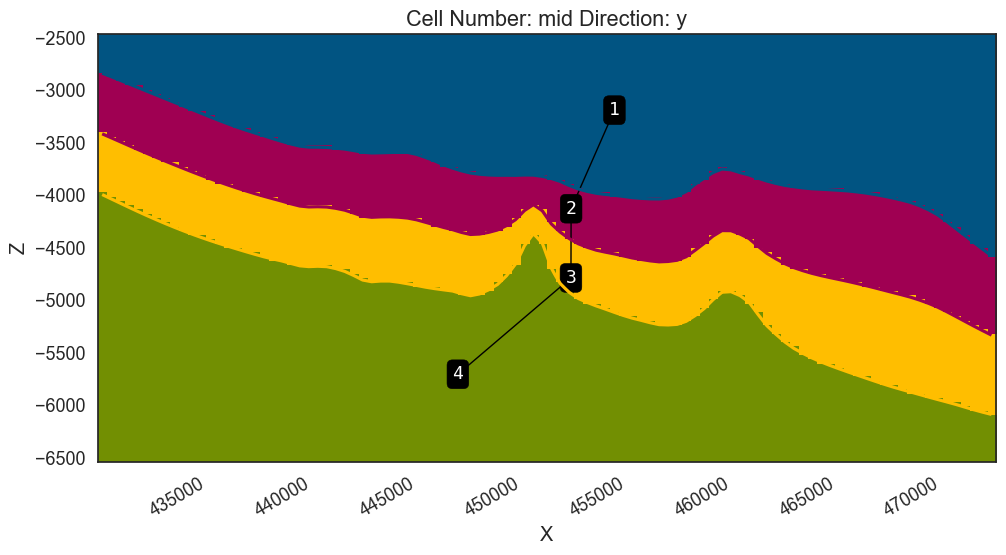

In [29]:
# Seção transversal do modelo
gp.plot_2d(
    geo_model,
    direction="y",
    show_data=False,
    show_lith=True,
    ve=5,
)
gp.plot.plot_topology(geo_model, edges_init, centroids_init)

- Salvando pelo GemPy e em pickle

In [30]:
# Salvar o modelo gerado em zip (contem todos os files relevantes para refazer o modelo)
gp.save_model(
    geo_model,
    compress=True,
)

True

In [31]:
import pickle
save_path = "../../../../../output/BES/interpreted_seismics_2/horizontes/teste_1/"
with open(save_path + nome_modelo, "wb") as f:
    pickle.dump(geo_model, f)